In [1]:
#importing libraries dataset
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.replace(to_replace=["Male", "Female"], value=[1,0], inplace=True) #male=1 ' female=0'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   int64  
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 200.6 KB


In [6]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [7]:
df.Gender.value_counts()

1    5000
0    3555
Name: Gender, dtype: int64

# Step 01 - LinearRegression

In [8]:
#Seperate X,y
x = df.drop('Weight', axis=1)
y = df[['Weight']]

In [9]:
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [10]:
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


Text(0.5, 1.0, 'Gender and Height')

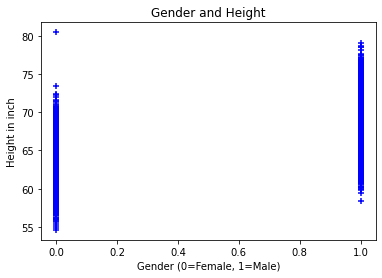

In [11]:
from matplotlib import pylab as plt
import numpy as np
import warnings as wr
wr.filterwarnings('ignore')

plt.scatter(df.Gender,df.Height,color='blue',marker='+')   #plt.scatter(x,y,color='blue',marker='+')
plt.xlabel('Gender (0=Female, 1=Male)')
plt.ylabel('Height in inch')
plt.title('Gender and Height')

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)
lr.coef_

array([[19.40887092,  5.97456691]])

In [14]:
lr.intercept_

array([-244.90628235])

In [15]:
lr.predict([[1,68.78]])


array([[185.43330094]])

In [16]:
df['predicted_weight_lr']=lr.predict(x)
df.head()

,Gender,Height,Weight,predicted_weight_lr
0,1,73.847017,241.893563,215.706533
1,1,68.781904,162.310473,185.444677
2,1,74.110105,212.740856,217.278372
3,1,71.730978,220.042470,203.064119
4,1,69.881796,206.349801,192.016054


In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae_lr = mean_absolute_error(ytest,lr.predict(xtest))
mse_lr = mean_squared_error(ytest,lr.predict(xtest))

print(mae_lr)

7.798520791542518


In [18]:
print(mse_lr)

94.68531257655638


In [19]:
lr.score(xtest,ytest)

0.9092763639950966

# Step 1.1 - KNeighborsRegressor

In [20]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(xtrain,ytrain)
knr.predict([[1,73.847017]])

array([[222.4602558]])

In [21]:
df['predicted_weight_knr']=knr.predict(x)
df.head()

,Gender,Height,Weight,predicted_weight_lr,predicted_weight_knr
0,1,73.847017,241.893563,215.706533,222.460256
1,1,68.781904,162.310473,185.444677,178.632644
2,1,74.110105,212.740856,217.278372,208.966826
3,1,71.730978,220.042470,203.064119,202.632591
4,1,69.881796,206.349801,192.016054,195.733860


In [22]:
mae_knr = mean_absolute_error(ytest,knr.predict(xtest))
mse_knr = mean_squared_error(ytest,knr.predict(xtest))

print(mae_knr)

8.662595538036236


In [23]:
print(mse_knr)

116.81202169040803


In [24]:
knr.score(xtest,ytest)

0.8880754464609395

# Step 02 - Classification

In [25]:
df_c = pd.read_csv('weight-height.csv')
df_c.replace(to_replace=["Male", "Female"], value=[1,0], inplace=True) #male=1 ' female=0'
x_c = df_c.drop('Gender', axis=1)
y_c = df_c[['Gender']]

In [26]:
y_c.head()

,Gender
0,1
1,1
2,1
3,1
4,1


In [27]:
x_c.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [28]:
from sklearn.model_selection import train_test_split
xtrain_c,xtest_c,ytrain_c,ytest_c = train_test_split(x_c,y_c,test_size=0.20,random_state=42)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(xtrain_c,ytrain_c)
knc.predict([[68.781904,162.310473]])

array([1], dtype=int64)

In [30]:
df_c['predicted_gender_knc']=knc.predict(x_c)
df_c.head()

,Gender,Height,Weight,predicted_gender_knc
0,1,73.847017,241.893563,1
1,1,68.781904,162.310473,1
2,1,74.110105,212.740856,1
3,1,71.730978,220.042470,1
4,1,69.881796,206.349801,1


# Evaluation of KNN Classifier

In [31]:
mae_knc = mean_absolute_error(ytest_c,knc.predict(xtest_c))
mse_knc = mean_squared_error(ytest_c,knc.predict(xtest_c))

print(mae_knc)

0.08182349503214495


In [32]:
print(mse_knc)

0.08182349503214495


In [33]:
knc.score(xtest_c,ytest_c)

0.9181765049678551